In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')

import math

In [2]:
plt.rc('text', usetex=True)  
plt.rc('font', family='sans-serif')

In [3]:
scores = pickle.load(open("./final_scores.pkl", "rb"))

In [4]:
scores['Deep Learning']['Bi-Directional LSTM'] = scores['Deep Learning']['BiDirectional LSTM']
del scores['Deep Learning']['BiDirectional LSTM']

scores['Deep Learning']['LSTM Auto-Encoder'] = scores['Deep Learning']['LSTM AutoEncoder']
del scores['Deep Learning']['LSTM AutoEncoder']

In [5]:
reform = {(outerKey, innerKey): values for outerKey, innerDict in scores.items() for innerKey, values in innerDict.items()}

result_df = pd.DataFrame(reform).transpose()
del result_df['r2_score']
del result_df['mean']
result_df = result_df.transpose()
result_df.index = ['MAE', 'RMSE']

In [6]:
print(result_df.transpose().round(3).to_latex())

\begin{tabular}{llrr}
\toprule
            &       &     MAE &    RMSE \\
\midrule
Machine Learning & Polynomial Regression &  21.040 &  26.254 \\
            & SVR Regression &  21.092 &  26.029 \\
            & Random Forest Regression &  20.461 &  25.590 \\
            & Linear Regression &  21.187 &  26.198 \\
            & Decision Tree Regression &  21.468 &  26.506 \\
Deep Learning & Multi Layer Perceptron &  20.977 &  25.955 \\
            & Bi-Directional LSTM &  20.563 &  25.574 \\
            & LSTM Auto-Encoder &  20.510 &  25.533 \\
Statistical & AR &  20.642 &  25.677 \\
            & Holt-Winters &  20.943 &  26.021 \\
            & ARIMA &  21.249 &  26.452 \\
\bottomrule
\end{tabular}



In [7]:
result_df = result_df.round(3)

In [8]:
mae_range  = max(result_df.transpose().round(3)['MAE']) - min(result_df.transpose().round(3)['MAE'])
rmse_range = max(result_df.transpose().round(3)['RMSE']) - min(result_df.transpose().round(3)['RMSE'])

In [9]:
round(mae_range, 3), rmse_range

(1.007, 0.972999999999999)

In [10]:
def line_format(label):
    return "\n".join(label.split(' ')).strip()

In [11]:
def calculate_relative_improvement(df):
    base_rmse_value = df['RMSE'].max()
    base_mae_value = df['MAE'].max()
    
    df['Relative RMSE'] = df['RMSE'].apply(lambda x: (-100)*(x - base_rmse_value)/(base_rmse_value))
    df['Relative MAE'] = df['MAE'].apply(lambda x: (-100)*(x - base_mae_value)/(base_mae_value))
    
    return df

In [12]:
def plot_bar_graph(df):

    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca()
    
    df = df.sort_values(by=['Relative MAE'])
    
    df = df[['Relative RMSE', 'Relative MAE']]
    
    ax.set_axisbelow(True)
    ax.grid(ls='--', zorder=-1)
    
    
    df.plot.barh(ax=ax, width=0.75, cmap="bwr")

    plt.grid(ls='--')
    ax.set_axisbelow(True)

    plt.xlabel(f"Improvement (in \%)", fontsize=24)
    plt.ylabel("Methods", fontsize=20)
    plt.title(f"Mumbai\n{approach}", fontsize=26)
    plt.xticks(fontsize=20)

    ax.set_yticklabels(map(line_format, df.index), fontsize=20, rotation=0);
    
    plt.savefig(f"./paper_figures/mumbai_{approach.replace(' ', '_')}_score.png", dpi=300, bbox_inches='tight')

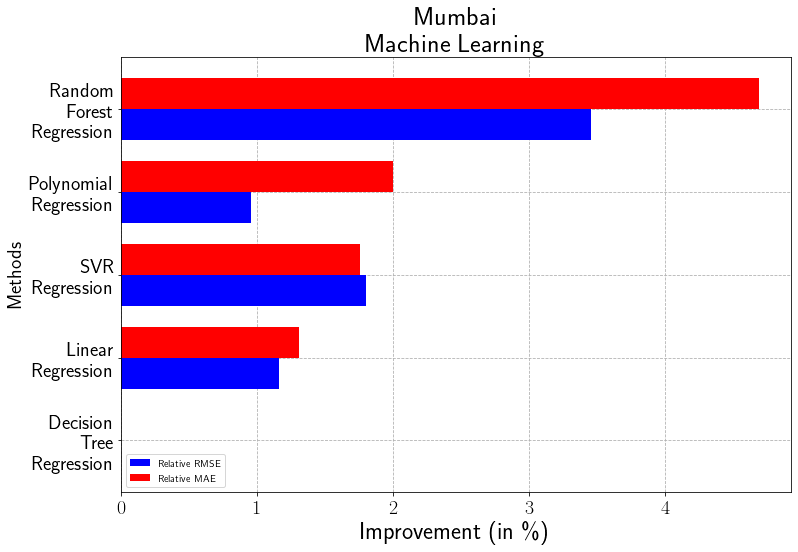

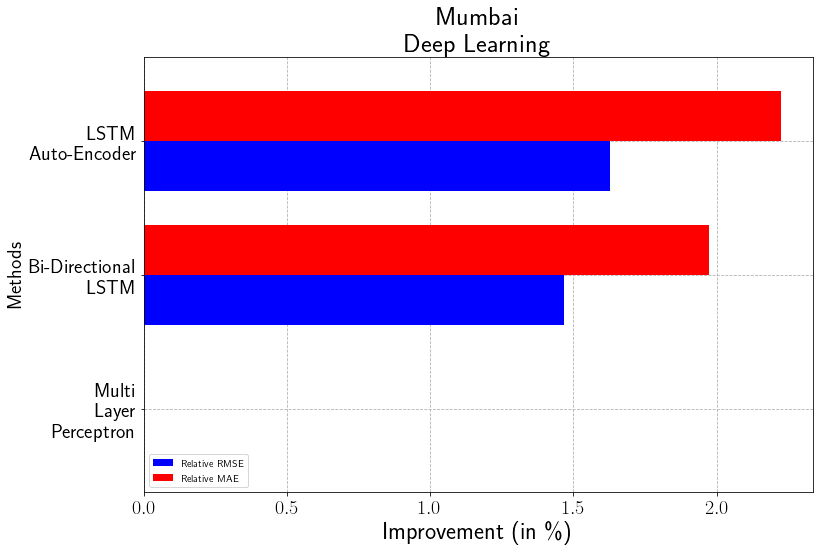

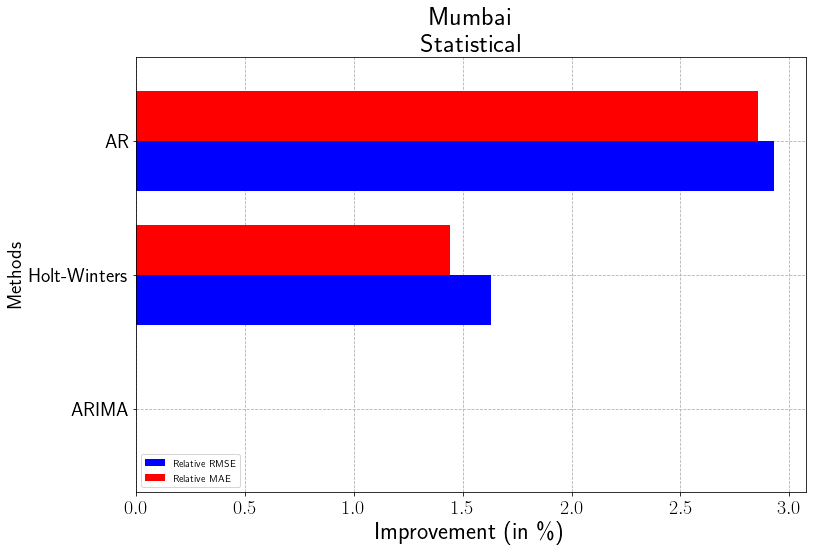

In [13]:
for approach in scores.keys():
    rel_imp_df = calculate_relative_improvement(result_df.loc[:,approach].transpose())
    plot_bar_graph(rel_imp_df)